># **Ciência dos Dados** <font color=purple>- Projeto 3</font>
   #### <font color=grey> <p>Gianlucca de La Torre Napolitano </p> <p>Lucas Nicascio dos Santos</p> </font>

Inicialmente é necessário ler o Dataset "Cannabis Strains" obtido na plataforma Kaggle, bem como criar um Data Frame ábil para análise, pois contém variáveis qualitativas e quantitativas.

In [1]:
%matplotlib inline
%reset -f
import pandas as pd
import numpy as np
from scipy.stats import beta, probplot
import matplotlib.pyplot as plt
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D

C:\Users\lucas\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Leitura dos arquivos em .csv
df = pd.read_csv('cannabis.csv')
data = df.dropna(how = 'any')
data

,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."
5,3-Bears-Og,indica,0.0,None,None,3 Bears OG by Mephisto Genetics is an autoflow...
6,3-Kings,hybrid,4.4,"Relaxed,Euphoric,Happy,Uplifted,Hungry","Earthy,Sweet,Pungent","The 3 Kings marijuana strain, a holy trinity o..."
7,303-Og,indica,4.2,"Relaxed,Happy,Euphoric,Uplifted,Giggly","Citrus,Pungent,Earthy",The indica-dominant 303 OG is a Colorado strai...
8,3D-Cbd,sativa,4.6,"Uplifted,Focused,Happy,Talkative,Relaxed","Earthy,Woody,Flowery",3D CBD from Snoop Dogg’s branded line of canna...
9,3X-Crazy,indica,4.4,"Relaxed,Tingly,Happy,Euphoric,Uplifted","Earthy,Grape,Sweet","Also known as Optimus Prime, the indica-domina..."


In [3]:
# Transformação de valores da coluna "Type" por meio do OneHotEncoder em parâmetros quantitativos para posterior uso na regressão
tipo = np.array(data.Type)
label_encoder = LabelEncoder()
Type_quan = label_encoder.fit_transform(tipo)
Type_quan
data = data.assign(Tipo = Type_quan)

In [4]:
# Obter lista de efeitos na coluna "Effects" e alocar na variável "efeitos", bem como remover os valores "None"
efeitos = data['Effects'].str.get_dummies(sep=',')
efeitos = efeitos.drop("None", axis =1)


In [5]:
# Junção de "efeitos" ao DataFrame
data_nova = data.join(efeitos, how = 'inner')

In [6]:
# Classificação dos valores em "Flavours" em colunas de 0 e 1 e  junção ao DataFrame
sabores = data['Flavor'].str.get_dummies(sep=',')
sabores = sabores.drop("None", axis =1)

In [7]:
datanova = data_nova.join(sabores, how = 'inner')

In [8]:
datanova1 = datanova.drop(['Effects','Flavor','Type','Strain','Description'], 1)
datanova1


,Rating,Tipo,Aroused,Creative,Dry,Energetic,Euphoric,Focused,Giggly,Happy,...,Strawberry,Sweet,Tar,Tea,Tobacco,Tree,Tropical,Vanilla,Violet,Woody
0,4.0,0,0,1,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,4.7,0,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,4.4,2,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,4.2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.6,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4.4,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
7,4.2,1,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
8,4.6,2,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
9,4.4,1,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [9]:
datanova1.columns

Index(['Rating', 'Tipo', 'Aroused', 'Creative', 'Dry', 'Energetic', 'Euphoric',
       'Focused', 'Giggly', 'Happy', 'Hungry', 'Mouth', 'Relaxed', 'Sleepy',
       'Talkative', 'Tingly', 'Uplifted', 'Ammonia', 'Apple', 'Apricot',
       'Berry', 'Blue', 'Blueberry', 'Butter', 'Cheese', 'Chemical',
       'Chestnut', 'Citrus', 'Coffee', 'Diesel', 'Earthy', 'Flowery', 'Fruit',
       'Grape', 'Grapefruit', 'Honey', 'Lavender', 'Lemon', 'Lime', 'Mango',
       'Menthol', 'Mint', 'Minty', 'Nutty', 'Orange', 'Peach', 'Pear',
       'Pepper', 'Pine', 'Pineapple', 'Plum', 'Pungent', 'Rose', 'Sage',
       'Skunk', 'Spicy/Herbal', 'Strawberry', 'Sweet', 'Tar', 'Tea', 'Tobacco',
       'Tree', 'Tropical', 'Vanilla', 'Violet', 'Woody'],
      dtype='object')

In [10]:
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    return results



In [11]:
Y = datanova1['Rating']
X = datanova1[['Aroused', 'Creative', 'Dry', 'Energetic', 'Euphoric',
       'Focused', 'Giggly', 'Happy', 'Hungry', 'Relaxed', 'Sleepy',
       'Talkative', 'Tingly', 'Uplifted']]



x = datanova1[[ 'Rating',
       'Tipo', 'Aroused', 'Creative', 'Dry', 'Energetic', 'Euphoric',
       'Focused', 'Giggly', 'Happy', 'Hungry', 'Mouth', 'Relaxed', 'Sleepy',
       'Talkative', 'Tingly', 'Uplifted', 'Ammonia', 'Apple', 'Apricot',
       'Berry', 'Blue', 'Blueberry', 'Butter', 'Cheese', 'Chemical',
       'Chestnut', 'Citrus', 'Coffee', 'Diesel', 'Earthy', 'Flowery', 'Fruit',
       'Grape', 'Grapefruit', 'Honey', 'Lavender', 'Lemon', 'Lime', 'Mango',
       'Menthol', 'Mint', 'Minty', 'Nutty', 'Orange', 'Peach', 'Pear',
       'Pepper', 'Pine', 'Pineapple', 'Plum', 'Pungent', 'Rose', 'Sage',
       'Skunk', 'Spicy/Herbal', 'Strawberry', 'Sweet', 'Tar', 'Tea', 'Tobacco',
       'Tree', 'Tropical', 'Vanilla', 'Violet', 'Woody']]

xx = datanova1[['Tipo', 'Aroused', 'Creative', 'Dry', 'Energetic', 'Euphoric',
       'Focused', 'Giggly', 'Happy', 'Hungry', 'Mouth', 'Relaxed', 'Sleepy',
       'Talkative', 'Tingly', 'Uplifted', 'Ammonia', 'Apple', 'Apricot',
       'Berry', 'Blue', 'Blueberry', 'Butter', 'Cheese', 'Chemical',
       'Chestnut', 'Citrus', 'Coffee', 'Diesel', 'Earthy', 'Flowery', 'Fruit',
       'Grape', 'Grapefruit', 'Honey', 'Lavender', 'Lemon', 'Lime', 'Mango',
       'Menthol', 'Mint', 'Minty', 'Nutty', 'Orange', 'Peach', 'Pear',
       'Pepper', 'Pine', 'Pineapple', 'Plum', 'Pungent', 'Rose', 'Sage',
       'Skunk', 'Spicy/Herbal', 'Strawberry', 'Sweet', 'Tar', 'Tea', 'Tobacco',
       'Tree', 'Tropical', 'Vanilla', 'Violet', 'Woody']]

xxx = datanova1[['Tipo', 'Aroused', 'Creative', 'Dry', 'Energetic', 'Euphoric',
       'Focused', 'Giggly', 'Happy', 'Hungry', 'Mouth', 'Relaxed', 'Sleepy',
       'Talkative', 'Tingly', 'Uplifted', 'Berry',  'Blueberry', 'Citrus', 
       'Coffee', 'Diesel',  'Flowery','Grape','Lemon', 
       'Lime','Menthol',  'Minty',  'Peach', 'Pepper', 'Pine',   'Pungent',  
       'Skunk', 'Spicy/Herbal',  'Sweet', 'Tropical']]

In [12]:
results = regress(xxx,Y)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     2515.
Date:                Thu, 22 Nov 2018   Prob (F-statistic):               0.00
Time:                        09:28:10   Log-Likelihood:                -2428.8
No. Observations:                2277   AIC:                             4926.
Df Residuals:                    2243   BIC:                             5120.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Tipo             0.0813      0.020      4.094      0.000       0.042       0.120
Aroused          0.8397      0.054     15.676      0.000       0.735       0.945
Creative         0.8521      0.033     26.021      0.000       0.788       0.916
Dry              2.0000      0.354      5.647      0.000       1.305       2.695
Energetic        0.8226      0.038     21.613      0.000       0.748       0.897
Euphoric         0.8214      0.033     24.839      0.000       0.757       0.886
Focused          0.8003      0.035     23.001      0.000       0.732       0.869
Giggly           0.7515      0.046     16.251      0.000       0.661       0.842
Happy            0.7885      0.039     20.435      0.000       0.713       0.864
Hungry           0.7571      0.039     19.296      0.000       0.680       0.834
Mouth            2.0000      0.354      5.647      0.000       1.305       2.695
Relaxed          1.0339      0.037     27.911      0.000       0.961       1.107
Sleepy           0.7717      0.037     21.073      0.000       0.700       0.843
Talkative        0.8294      0.043     19.475      0.000       0.746       0.913
Tingly           0.7716      0.043     18.140      0.000       0.688       0.855
Uplifted         0.8035      0.032     24.773      0.000       0.740       0.867
Berry            0.1247      0.046      2.702      0.007       0.034       0.215
Blueberry        0.0887      0.066      1.345      0.179      -0.041       0.218
Citrus           0.0842      0.040      2.110      0.035       0.006       0.162
Coffee           0.2452      0.147      1.663      0.096      -0.044       0.534
Diesel           0.0914      0.051      1.801      0.072      -0.008       0.191
Flowery          0.1436      0.049      2.933      0.003       0.048       0.240
Grape            0.0939      0.068      1.375      0.169      -0.040       0.228
Lemon            0.0926      0.057      1.632      0.103      -0.019       0.204
Lime             0.1364      0.101      1.349      0.178      -0.062       0.335
Menthol          0.2862      0.153      1.869      0.062      -0.014       0.586
Minty            0.2461      0.113      2.171      0.030       0.024       0.468
Peach            0.6777      0.291      2.326      0.020       0.106       1.249
Pepper           0.1614      0.097      1.667      0.096      -0.028       0.351
Pine             0.1150      0.048      2.384      0.017       0.020       0.210
Pungent          0.0830      0.042      1.987      0.047       0.001       0.165
Skunk            0.1006      0.059      1.699      0.089      -0.016       0.217
Spicy/Herbal     0.1311      0.053      2.469      0.014       0.027       0.235
Sweet            0.1007      0.034      2.999      0.003       0.035       0.167
Tropical         0.0813      0.062      1.316      0.188      -0.040       0.203
=====

((array([-3.42769352, -3.17905023, -3.04127409, ...,  3.04127409,
          3.17905023,  3.42769352]),
  array([-4.47286674, -4.34713983, -4.27607857, ...,  5.        ,
          5.        ,  5.        ])),
 (0.5635367686883357, 0.0672748114443772, 0.804130752437238))

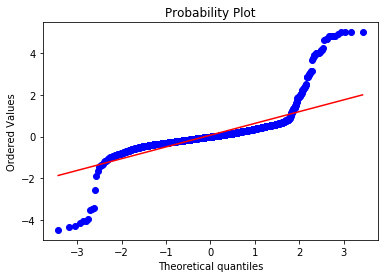

In [13]:
probplot(results.resid, dist = "norm", plot = plt)


In [25]:
foo = results.params[['Tipo', 'Aroused', 'Creative', 'Dry', 'Energetic', 'Euphoric',
       'Focused', 'Giggly', 'Happy', 'Hungry', 'Mouth', 'Relaxed', 'Sleepy',
       'Talkative', 'Tingly', 'Uplifted']]
foo

Tipo         0.081271
Aroused      0.839735
Creative     0.852110
Dry          2.000000
Energetic    0.822556
Euphoric     0.821388
Focused      0.800298
Giggly       0.751463
Happy        0.788521
Hungry       0.757051
Mouth        2.000000
Relaxed      1.033868
Sleepy       0.771687
Talkative    0.829409
Tingly       0.771553
Uplifted     0.803544
dtype: float64

In [27]:
np.dot(foo, np.array([1, 0,0,0,0,1,0,0,1,0,0,1,1,0,0,1]))

4.300279238628605

In [98]:
#datanova1["is_duplicated"]= datanova1.duplicated(keep=False)
#dataset = datanova1[datanova1.is_duplicated==True]